<a href="https://colab.research.google.com/github/2pushkaraj3/Space-Crawlers/blob/main/nrsc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 51.3 MB/s eta 0:00:00


In [ ]:
pip install --upgrade Fiona


In [ ]:
import pandas as pd
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import imghdr
from rasterio.mask import geometry_mask
from shapely.geometry import Point
import numpy as np
from sklearn.cluster import DBSCAN

In [ ]:
# Aadhar centers
aadhar_df = pd.read_csv("addhar_centers.csv")

# Night light image
night_light_img = rasterio.open("2022_India.tif")

# # Reference light intensity values
# intensity_mapping = plt.imread("ntl.png")

# District boundaries
district_gdf = gpd.read_file("india_district_boundary.shp")



In [ ]:
aadhar_gdf = gpd.GeoDataFrame(
    aadhar_df,
    geometry=gpd.points_from_xy(aadhar_df["lat"], aadhar_df["long"]),
)


In [ ]:
# Check for missing geometry or values
if aadhar_gdf.geometry.is_empty.any():
    print("Warning: Missing geometry in Aadhar centers data!")
    # Handle missing geometry (e.g., drop rows, impute values)


In [ ]:
if aadhar_df.isnull().any().any():
    print("Warning: Missing values found in Aadhar centers data!")
    # Handle missing values (e.g., impute with mean, median)

In [ ]:

# Assuming 'geometry' is the column containing Point geometries in aadhar_gdf
aadhar_gdf['geometry'] = aadhar_gdf['geometry'].apply(Point)




In [ ]:
from rasterio.plot import show as rioshow  # Rename the show function to avoid conflicts

In [ ]:
!apt-get install -y libgdal-dev
!apt-get install -y python3-gdal


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgdal-dev is already the newest version (3.4.3+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  gdal-bin python-numpy-doc python3-pytest
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,434 kB of archives.
After this operation, 23.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.4.3+dfsg-1~jammy0 [967 kB]
Fetched 4,434 kB in 1s (3,374 kB/s)
Selecting previously un

In [ ]:
!pip install --upgrade rasterio
!pip install GDAL==3.4.3 --no-binary :all:


In [ ]:
def main():
    # Step 1: Load Spatial Data
    district_boundary_path = "india_district_boundary.shp"
    district_boundary = gpd.read_file(district_boundary_path)

    # Step 2: Integrate Aadhaar Center Data
    aadhar_centers_path = "addhar_centers.csv"
    aadhar_centers_df = gpd.read_file(aadhar_centers_path)

    # Convert the Aadhaar Centers DataFrame to a GeoDataFrame
    aadhar_centers_gdf = gpd.GeoDataFrame(
        aadhar_centers_df,
        geometry=gpd.points_from_xy(aadhar_centers_df['long'], aadhar_centers_df['lat']),
        crs='EPSG:4326'  # Assuming latitudes and longitudes are in WGS 84
    )

    # Step 3: Utilize 2022_India.tif
    raster_path = "2022_India.tif"
    raster_data = rasterio.open(raster_path)



    # # # Visualize District Boundaries
    # district_boundary.plot()
    # plt.title("District Boundaries")
    # plt.show()

    # # # Visualize Aadhaar Centers on District Boundaries
    # ax = district_boundary.plot()
    # aadhar_centers_gdf.plot(ax=ax, color='red', markersize=0.001)
    # plt.title("Aadhaar Centers on District Boundaries")
    # plt.show()

    # # Plot District Boundaries, Aadhaar Centers, and Raster Data
    fig, ax = plt.subplots(figsize=(10, 10))
    rioshow(raster_data.read(1), cmap='viridis', ax=ax)
    district_boundary.plot(ax=ax, facecolor='red', edgecolor='black')
    aadhar_centers_df.plot(ax=ax, color='white', markersize=0.001, marker='o', label='Aadhaar Centers')

    plt.title("District Boundaries, Aadhaar Centers, and Raster Data")
    plt.legend()
    plt.show()





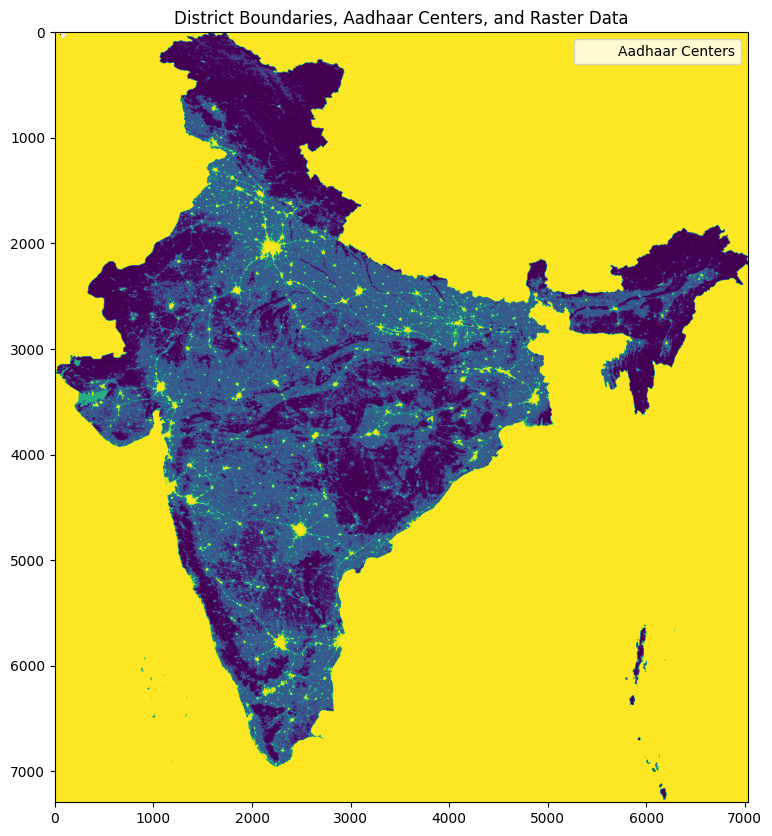

In [ ]:
if __name__ == "__main__":
    main()

In [ ]:
pip install --upgrade rasterio


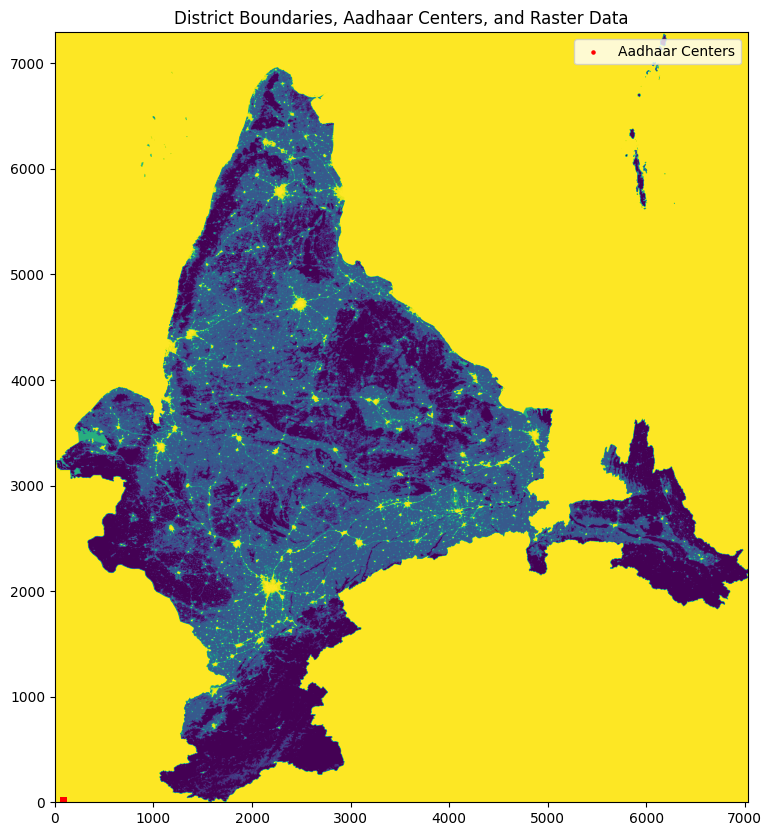

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt

def main():
    # Load spatial data
    district_boundary_path = "india_district_boundary.shp"
    district_boundary = gpd.read_file(district_boundary_path)

    aadhar_centers_path = "addhar_centers.csv"
    aadhar_centers_df = gpd.read_file(aadhar_centers_path)
    aadhar_centers_gdf = gpd.GeoDataFrame(
        aadhar_centers_df,
        geometry=gpd.points_from_xy(aadhar_centers_df['long'], aadhar_centers_df['lat']),
        crs='EPSG:4326'  # Assuming latitudes and longitudes are in WGS 84
    )

    raster_path = "2022_India.tif"
    raster_data = rasterio.open(raster_path)

    # Ensure consistent CRS
    raster_crs = raster_data.crs
    district_boundary = district_boundary.to_crs(raster_crs)
    aadhar_centers_gdf = aadhar_centers_gdf.to_crs(raster_crs)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot raster data first
    rioshow(raster_data.read(1), cmap='viridis', ax=ax)

    # Plot district boundaries with appropriate extent
    district_boundary.plot(ax=ax, facecolor='none', edgecolor='black')
    rasterio.plot.show(raster_data, ax=ax)  # Replaces rioshow(raster_data.read(1), ...)

    # Plot Aadhaar centers with visible markers
    aadhar_centers_gdf.plot(ax=ax, color='red', markersize=5, marker='o', label='Aadhaar Centers')

    plt.title("District Boundaries, Aadhaar Centers, and Raster Data")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=ddd9db35189fd5053ef3d9ca4e3ddacf2d539655dbbeffc5a766e2b0408d45fc
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
!pip install geopandas

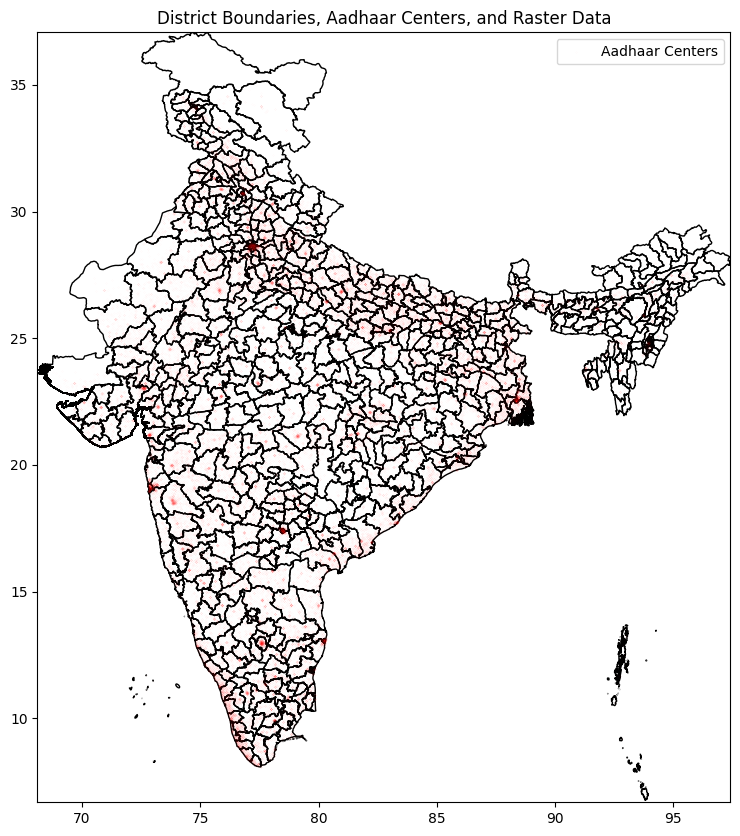

NameError: ignored

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt
import networkx as nx

def main():
    # Load spatial data
    district_boundary_path = "india_district_boundary.shp"
    district_boundary = gpd.read_file(district_boundary_path)

    aadhar_centers_path = "addhar_centers.csv"
    aadhar_centers_df = gpd.read_file(aadhar_centers_path)
    aadhar_centers_gdf = gpd.GeoDataFrame(
        aadhar_centers_df,
        geometry=gpd.points_from_xy(aadhar_centers_df['long'], aadhar_centers_df['lat']),
        crs='EPSG:4326'  # Assuming latitudes and longitudes are in WGS 84
    )

    raster_path = "2022_India.tif"
    raster_data = rasterio.open(raster_path)

    # Ensure consistent CRS
    raster_crs = raster_data.crs
    district_boundary = district_boundary.to_crs(raster_crs)
    aadhar_centers_gdf = aadhar_centers_gdf.to_crs(raster_crs)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot raster data first (adjust colormap if needed)
    try:
        rioshow(raster_data.read(1), cmap='gray', ax=ax)  # Or use rasterio.plot.show
    except AttributeError:
        rasterio.plot.show(raster_data, ax=ax)  # Fallback if rioshow is unavailable

    # Plot district boundaries with appropriate extent
    district_boundary.plot(ax=ax, facecolor='none', edgecolor='black')
    try:
        ax.set_extent(raster_data.bounds)  # Adjust extent if possible
    except AttributeError:
        ax.set_xlim(raster_data.bounds.left, raster_data.bounds.right)
        ax.set_ylim(raster_data.bounds.bottom, raster_data.bounds.top)

    # Plot Aadhaar centers with visible markers
    aadhar_centers_gdf.plot(ax=ax, color='red', markersize=0.0001, marker='o', label='Aadhaar Centers')

    plt.title("District Boundaries, Aadhaar Centers, and Raster Data")
    plt.legend()
    plt.show()

    G = nx.Graph()

    # Add nodes (Aadhaar centers)
    for i, row in aadhar_centers_df.iterrows():
        G.add_node(i, pos=(row['long'], row['lat']))

    # Define distance threshold
    distance_threshold = 10  # Replace with your desired threshold (in kilometers)

    # Create edges based on proximity
    for node1, node2 in itertools.combinations(G.nodes, 2):
        point1 = G.nodes[node1]['pos']
        point2 = G.nodes[node2]['pos']
        distance = gpd.GeoSeries([point1, point2]).distance(crs=aadhar_centers_gdf.crs).item()
        if distance <= distance_threshold:
            G.add_edge(node1, node2)

    # Draw the graph on top of the existing plot
    nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=50, alpha=0.7, node_color="blue", edge_color="gray")

if __name__ == "__main__":
    main()


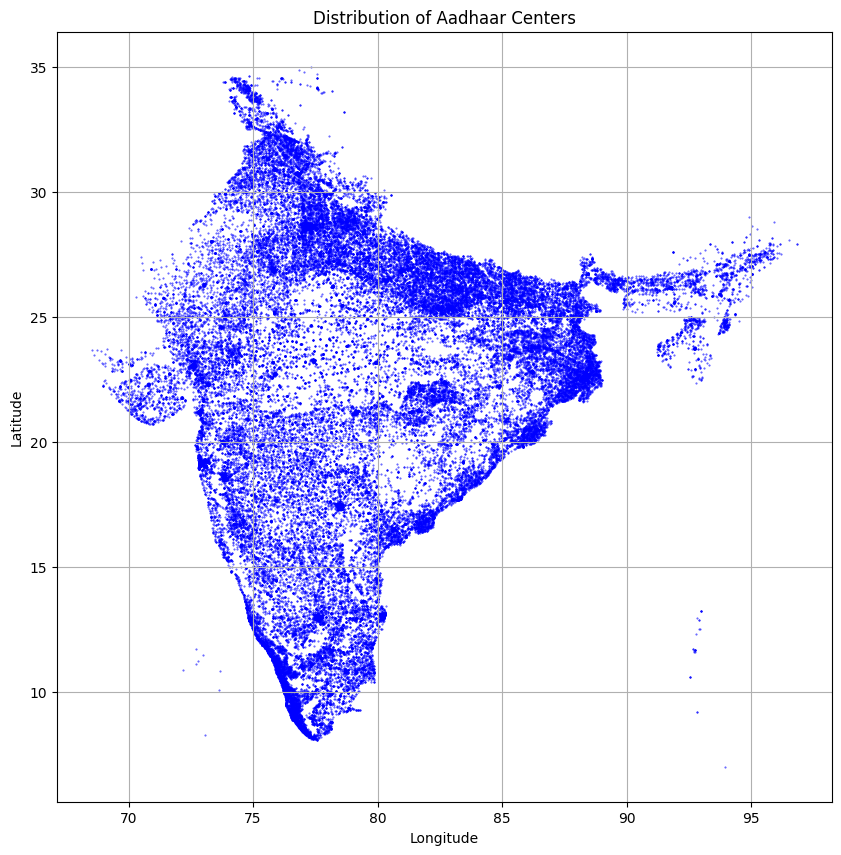

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Aadhaar center data from CSV
aadhar_centers_df = pd.read_csv("addhar_centers.csv")

# Extract longitude and latitude
longitude = aadhar_centers_df["long"]
latitude = aadhar_centers_df["lat"]

# Create the graph
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
plt.scatter(longitude, latitude, s=0.22, alpha=0.7, c="blue", label="Aadhaar Centers")  # Adjust marker size, transparency, and color

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of Aadhaar Centers")

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()


TypeError: ignored

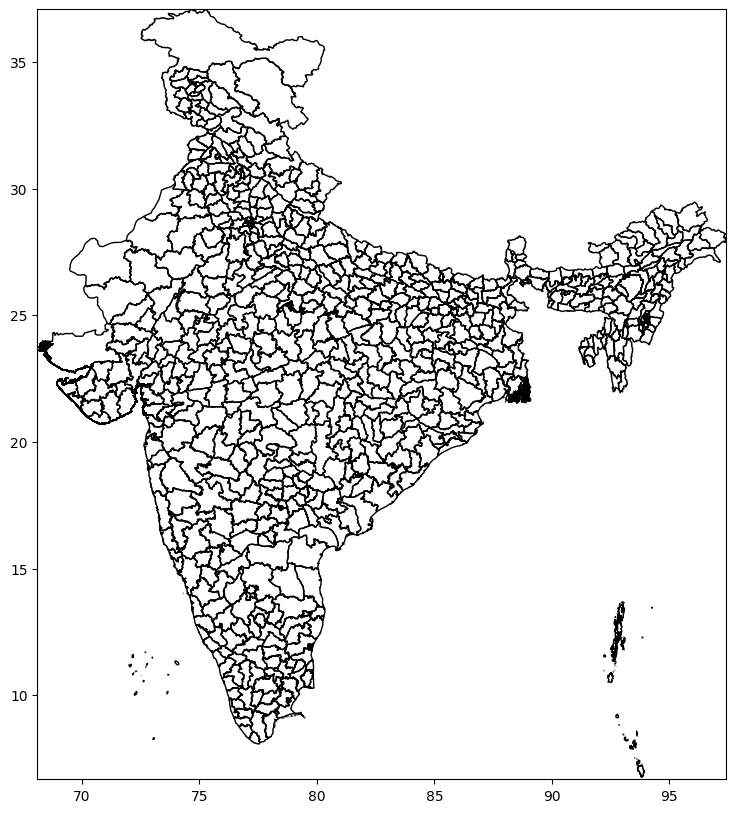

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt
import networkx as nx
import itertools  # For efficient edge creation

def main():
    # Load spatial data
    district_boundary_path = "india_district_boundary.shp"
    district_boundary = gpd.read_file(district_boundary_path)

    aadhar_centers_path = "addhar_centers.csv"
    aadhar_centers_df = gpd.read_file(aadhar_centers_path)
    aadhar_centers_gdf = gpd.GeoDataFrame(
        aadhar_centers_df,
        geometry=gpd.points_from_xy(aadhar_centers_df['long'], aadhar_centers_df['lat']),
        crs='EPSG:4326'  # Assuming latitudes and longitudes are in WGS 84
    )

    raster_path = "2022_India.tif"
    raster_data = rasterio.open(raster_path)

    # Ensure consistent CRS
    raster_crs = raster_data.crs
    district_boundary = district_boundary.to_crs(raster_crs)
    aadhar_centers_gdf = aadhar_centers_gdf.to_crs(raster_crs)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot raster data first (adjust colormap if needed)
    try:
        rioshow(raster_data.read(1), cmap='gray', ax=ax)  # Or use rasterio.plot.show
    except AttributeError:
        rasterio.plot.show(raster_data, ax=ax)  # Fallback if rioshow is unavailable

    # Plot district boundaries with appropriate extent
    district_boundary.plot(ax=ax, facecolor='none', edgecolor='black')
    try:
        ax.set_extent(raster_data.bounds)  # Adjust extent if possible
    except AttributeError:
        ax.set_xlim(raster_data.bounds.left, raster_data.bounds.right)
        ax.set_ylim(raster_data.bounds.bottom, raster_data.bounds.top)

    # Create a networkx graph
    G = nx.Graph()

    # Add nodes (Aadhaar centers)
    for i, row in aadhar_centers_df.iterrows():
        G.add_node(i, pos=(row['long'], row['lat']))

    # Define distance threshold
    distance_threshold = 10  # Replace with your desired threshold (in kilometers)

    # Create edges based on proximity
    for node1, node2 in itertools.combinations(G.nodes, 2):
        point1 = G.nodes[node1]['pos']
        point2 = G.nodes[node2]['pos']
        distance = gpd.GeoSeries([point1, point2]).distance(crs=aadhar_centers_gdf.crs).item()
        if distance <= distance_threshold:
            G.add_edge(node1, node2)

    # Draw the graph on top of the existing plot
    nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=50, alpha=0.7, node_color="blue", edge_color="gray")

    # Plot Aadhaar centers with visible markers
    aadhar_centers_gdf.plot(ax=ax, color='red', markersize=5, marker='o', label='Aadhaar Centers')

    plt.title("District Boundaries, Aadhaar Centers, and Raster Data with Graph (Geographical Proximity)")
    plt.legend()
    plt.show()
if __name__ == "__main__":
    main()
